Evaluate various CNN models on widely known datasets
Support for the article: Radu Dogaru, Ioana Dogaru, "RD-CNN: A Compact and Efficient Convolutional Neural Net for Sound Classification", accepted at ISETC 2020

Run CELL1 or CELL2 for the specific dataset 
(some classic sets or ESC50 "spectral" images resulted from RDT processing)  
Then introduce the specific model name (.h5 files and/or ESC datasets must be previously uploaded in the Files tab) 


Run CELL3 and 4 (Runtime set to "NONE" allows evaluate a latency performance closer to a restricted CPU platform)

Run CELLS 5 and 6 to see prediction examples and detailed performance metrics. 

Run CELL 7 (RDT based image processor) and CELL 8 for prediction of the model given an input sound signal (.wav) file 

Copyright - Radu and Ioana Dogaru, 
Last update Oct. 20, 2020 

In [ ]:
!pip install tensorflow==2.2.0  ## run this after every initialization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 3.0 MB 47.9 MB/s 
     |████████████████████████████████| 2.9 MB 45.9 MB/s 
     |████████████████████████████████| 454 kB 65.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [ ]:
# CELL 1 Datasets 
#---------------------------------------------------

%load_ext tensorboard
import numpy as np
# import keras
from google.colab import drive
drive.mount('/content/drive')
import IPython.display as ipd #Allows Audio files to be played directly in the notebook
import librosa #library we will use to analyze sounds
import librosa.display #library module which helps visualize the waveforms
import os
import glob
import numpy as np
import pandas as pd
import random
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns

# tf.config.run_functions_eagerly(True)

sns.set_style("whitegrid")
#dataset='cifar10' # mnist or f-mnist or cifar10 
reduced=0
dformat='channels_last'

file_emotion = []
file_path = []
audios = glob.glob(os.path.join("/content/drive/MyDrive/Databases/emo-db/*.wav"), recursive=True)
for file in audios:
  file_path.append(file)
  em = file.split(".")[0][-2]
  if em =='W':
    file_emotion.append('angry')
  elif em=='E':
    file_emotion.append('disgust')
  elif em=='A':
    file_emotion.append('fear')
  elif em=='F':
    file_emotion.append('happy')
  elif em=='N':
    file_emotion.append('neutral')  ## neutral = boredom?  ###MODIFICAT
  elif em=='T':
    file_emotion.append('sad')
  elif em == 'L':
    file_emotion.append('neutral')

#dataframe for emotions
emo_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
emodb_df = pd.concat([emo_df, path_df], axis=1)
print(emodb_df)


Mounted at /content/drive
    Emotions                                               Path
0      happy  /content/drive/MyDrive/Databases/emo-db/12a01F...
1    neutral  /content/drive/MyDrive/Databases/emo-db/03a01N...
2    neutral  /content/drive/MyDrive/Databases/emo-db/08a01L...
3      happy  /content/drive/MyDrive/Databases/emo-db/08a01F...
4      angry  /content/drive/MyDrive/Databases/emo-db/08a01W...
..       ...                                                ...
530  neutral  /content/drive/MyDrive/Databases/emo-db/16b01L...
531      sad  /content/drive/MyDrive/Databases/emo-db/16b01T...
532    angry  /content/drive/MyDrive/Databases/emo-db/15b01W...
533  disgust  /content/drive/MyDrive/Databases/emo-db/16b01E...
534  neutral  /content/drive/MyDrive/Databases/emo-db/15b01L...

[535 rows x 2 columns]


In [ ]:
####ESC-50 DATASET ##### 
# define directories
base_dir = "/content/drive/MyDrive/Databases"
esc_dir = os.path.join(base_dir, "ESC-50-master")
meta_file = os.path.join(esc_dir, "meta/esc50.csv")
audio_dir = os.path.join(esc_dir, "audio/")
# load metadata
meta_data = pd.read_csv(meta_file)
# print(meta_data)
data_size = meta_data.shape
class_dict = {}
filepath_dict={}
filepath_list=[]
class_list=[]
print(data_size[0])

print(audio_dir)
for file in os.listdir(audio_dir):
  filepath_list.append(audio_dir+file)
  clasa = file.split(".")[0].split("-")[-1]
  class_list.append(clasa)
  esc50path_df = pd.DataFrame(filepath_list, columns=["Path"])
  esc50class_df = pd.DataFrame(class_list, columns=["Class"])
  esc50_df = pd.concat([esc50path_df, esc50class_df], axis=1)
# for i in range(data_size[0]):
#   print(i)
#     # if meta_data.loc[i,"target"] not in class_dict.keys():
#   class_dict[meta_data.loc[i,"target"]] = meta_data.loc[i,"category"]
#   filepath_dict[meta_data.loc[i, "target"]] = audio_dir + meta_data.loc[i, "filename"]

# esc50path_df = pd.Dataframe()
# esc50_df = pd.DataFrame(list(class_dict.items()), columns=["labels","classes"])
# esc50file_df = pd.DataFrame(list(filepath_dict.items()), columns=["label","filename"])
# esc50file_df.drop("label", axis=1, inplace=True)
# esc50_df = pd.concat([esc50_df, esc50file_df], axis=1)

esc50_df

In [ ]:
Ravdess = "/content/drive/MyDrive/Databases/audioEmotion/"
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({ 1:'neutral',2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)  # 1:'neutral' ## 2:'neutral' actually 'calm' ##Modified for RTE set
Ravdess_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/Databases/audioEmotion/...
1,neutral,/content/drive/MyDrive/Databases/audioEmotion/...
2,neutral,/content/drive/MyDrive/Databases/audioEmotion/...
3,neutral,/content/drive/MyDrive/Databases/audioEmotion/...
4,neutral,/content/drive/MyDrive/Databases/audioEmotion/...


In [ ]:
Tess = "/content/drive/MyDrive/Databases/TESS/"
tess_directory_list = os.listdir(Tess)
# print(tess_directory_list)
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        # print(file)
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...
1,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...
2,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...
3,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...
4,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...


In [ ]:
comenzi = "/content/drive/MyDrive/Databases/mb_auto_voice_new_v2/"
comenzi_directory_list = os.listdir(comenzi)
# print(tess_directory_list)
file_class = []
file_path = []

for dir in comenzi_directory_list:
    directories = os.listdir(comenzi + dir)
    for file in directories:
        # print(file)
     
       
        file_class.append(dir)
        file_path.append(comenzi + dir + '/' + file)
        
# dataframe for emotion of files
comenzi_df = pd.DataFrame(file_class, columns=['Class'])

# dataframe for path of files.
pathcomenzi_df = pd.DataFrame(file_path, columns=['Path'])
Comenzi_df = pd.concat([pathcomenzi_df, comenzi_df], axis=1)
Comenzi_df.head()

,Path,Class
0,/content/drive/MyDrive/Databases/mb_auto_voice...,claxon
1,/content/drive/MyDrive/Databases/mb_auto_voice...,claxon
2,/content/drive/MyDrive/Databases/mb_auto_voice...,claxon
3,/content/drive/MyDrive/Databases/mb_auto_voice...,claxon
4,/content/drive/MyDrive/Databases/mb_auto_voice...,claxon


In [ ]:
import re
urbansound = '/content/drive/MyDrive/Databases/UrbanSound8K/'
urbansound_dir_list = os.listdir(urbansound)
urbansound_metadata = os.path.join(urbansound, 'metadata/UrbanSound8K.csv')
urbansound_audiofolds = os.path.join(urbansound, 'audio/')
urbansound_pathlist = []
urbansound_classlist = []
urbansound_foldlist = []
# print(urbansound_audiofolds)
for fold in os.listdir(urbansound_audiofolds):
  if "." not in fold:
    # print(fold)
    # print(os.listdir(urbansound_audiofolds+fold))
    for audio in os.listdir(urbansound_audiofolds+fold):
      if "DS_" not in audio:
        # print(audio)
        urbansound_pathlist.append(urbansound_audiofolds + fold + "/" + audio)
        urbansound_classlist.append(audio.split("-")[1])
        urbansound_foldlist.append(re.findall(r'\d+', fold))

# print(urbansound_pathlist[1703])
# print(urbansound_classlist[0])
# print(urbansound_foldlist[1703])

urbanpath_df = pd.DataFrame(urbansound_pathlist, columns=['Path'])
urbanclass_df = pd.DataFrame(urbansound_classlist, columns=['Class'])
urbanfold_df = pd.DataFrame(urbansound_foldlist, columns=['Fold'])

urbansound_df = pd.concat([urbanpath_df, urbanclass_df, urbanfold_df], axis=1)
print(urbansound_df.head())

In [ ]:
# creating Dataframe using all the dataframes we created so far (emotion).
data_path = pd.concat([Tess_df, Ravdess_df, emodb_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...
1,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...
2,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...
3,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...
4,sad,/content/drive/MyDrive/Databases/TESS/OAF_Sad/...


In [ ]:
plt.title('Count of classes', size=16)
# sns.countplot(Ravdess_df.Emotions) ## for emotions
sns.countplot(data_path.Emotions) ## for sounds
# print(len(Tess_df))
plt.ylabel('Count', size=12)
# plt.xlabel('Emotions', size=12)  ## for emotions
plt.xlabel('classes', size=12)  ## for sounds
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

In [ ]:
 ### Train and evaluate via 10-Folds cross-validation ### in case of US8K
Xi={}
Yi={}
for i in range(1,11):
  Xi[str(i)] = []
  Yi[str(i)] = []
print(Xi)
for index,elem in enumerate(X):
  Xi[str(Z[index])].append(elem)
  Yi[str(Z[index])].append(Y[index])


{'1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': []}


In [ ]:
##### K-FOLD ENCODING AND PROCESSING (USED FOR 10-FOLD CROSSVALIDATION - US8K)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from tensorflow.keras.utils import to_categorical as to_categorical
from sklearn.model_selection import train_test_split
encoder = OneHotEncoder()


for i in range(1,11):
  Xi[str(i)] = np.asarray(Xi[str(i)])
  Yi[str(i)] = np.asarray(Yi[str(i)])



  Yi[str(i)] = encoder.fit_transform(np.array(Yi[str(i)]).reshape(-1,1)).toarray()    

In [ ]:
#GENERAL K-FOLD CROSS VALIDATION
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler



encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
X=np.asarray(X)
Y=np.asarray(Y)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(X, Y)
for train_index, test_index in sss.split(X, Y):
  print("TRAIN:", train_index, "TEST:", test_index)
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
print(y_train[0])

In [ ]:
#Run to onehotencode
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from tensorflow.keras.utils import to_categorical as to_categorical
from sklearn.model_selection import train_test_split

X=np.asarray(X)
Y=np.asarray(Y)



encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()    



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((146, 30, 6), (146, 9), (37, 30, 6), (37, 9))

In [ ]:
print(np.shape(x_train[0]))

(53, 6, 1)


In [ ]:
np.save("esc_x_train_214_7.npy", x_train, allow_pickle=True)
np.save("esc_y_train_214_7.npy", y_train, allow_pickle=True)
np.save("esc_x_test_214_7.npy", x_test, allow_pickle=True)
np.save("esc_y_test_214_7.npy", y_test, allow_pickle=True)

In [ ]:
np.set_printoptions(threshold=25)
i=0

A=OneHotEncoder().fit_transform(np.array(Features['labels'].values).reshape(-1,1)).toarray()
print(Features['labels'][1050])
print(A[1050])
# for elem in A:
#   if(i<=9):
#     print(i, elem)
#     i=i+1

print(len(A))
print(len(Features['labels']))

In [ ]:
## Expand to fit the model -> 4 dim.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
kfold = False  ## set false flag for later k-fold check when generating model

In [ ]:
## Expand for K-Fold cross validation
for i in range(1,11):
  Xi[str(i)] = np.expand_dims(Xi[str(i)], axis=-1)
  # Yi[str(i)] = np.expand_dims(Yi[str(i)], axis=-1)

print(np.shape(Xi[str(i)]), np.shape(Yi[str(i)]))
kfold = True   ## set true flag for later kfold check when generating model

(800, 45, 6, 1) (800, 10)


In [ ]:

# myopt=tf.keras.optimizers.Adam(learning_rate=0.001)
# my_loss='categorical_crossentropy'

# model.compile(loss=my_loss, 
#               optimizer=myopt,   
#               metrics=['accuracy'])
model = tf.keras.models.load_model('/content/drive/MyDrive/Models_Variables/tess_test1_tf220.h5')
model.summary()
# model2.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 53, 6, 20)         200       
_________________________________________________________________
activation (Activation)      (None, 53, 6, 20)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 6, 20)         3620      
_________________________________________________________________
activation_1 (Activation)    (None, 53, 6, 20)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 6, 20)         3620      
_________________________________________________________________
batch_normalization (BatchNo (None, 53, 6, 20)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 6, 20)         0

In [ ]:
## convert loaded HDF5 model to TFLITE format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('us_45_6.tflite', 'wb') as f:
  f.write(tflite_model)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /tmp/tmpfcqwy9wf/assets


INFO:tensorflow:Assets written to: /tmp/tmpfcqwy9wf/assets


In [ ]:
# NL_CNN MODEL 
#==============================================================================================
from tensorflow import keras
# import tensorflow as tf
from tensorflow.keras.models import Sequential
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers  import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D  # straturi convolutionale si max-pooling 
from tensorflow.keras.optimizers import *
# from keras import backend as K
from tensorflow.keras.regularizers import *
import datetime

def create_nl_cnn_model(input_shape, num_classes, flat=0, filtre=(40,50,60)):
  # Arguments: k - multiplication coefficient 
  # Structure parameteres 
  # filtre1=width ; filtre2=int(kfil*filtre1) ; filtre3=(kfil*filtre2)  # filters (kernels) per each layer - efic. pe primul 
  # filtre1=8  ## 40
  # filtre2=8  ## 50
  # filtre3=8  ## 60
  filtre=filtre
  # nr_conv=3                                   # 0, 1, 2 sau 3  (number of convolution layers)
  # csize1=3; csize2=3 ; csize3=3             # convolution kernel size (square kernel) 
  csize1=3; csize2=3; csize3=3
  psize1=4; psize2=4 ; psize3=4              # pooling size (square)
  str1=1; str2=2; str3=2                      # stride pooling (downsampling rate) 
  pad='same';                                 # padding style ('valid' is also an alternative)
    

  nonlin_type='relu'                        # may be other as well 'tanh' 'elu' 'softsign'
  
  drop_cv=0.5
  
  

  model = Sequential()
  model.filtre = filtre
  initializer = tf.keras.initializers.VarianceScaling(scale=1.0, mode='fan_avg', distribution='uniform')         ## He initialization works better for layers with ReLu activation. It is implemented in variance scaling initialization

  
  model.add(Conv2D(filtre[0], padding=pad, kernel_size=(5,5), input_shape=input_shape, kernel_initializer=initializer) )          #### STRATUL PRIMAR
  model.add(Activation(nonlin_type))
  model.add(Conv2D(filtre[0], padding=pad, kernel_size=(5,5), kernel_initializer=initializer) )   
  model.add(Activation(nonlin_type))
  model.add(Conv2D(filtre[0], padding=pad, kernel_size=(5,5), kernel_initializer=initializer) )
  model.add(BatchNormalization())                     ## BN after Activation layer

  model.add(MaxPooling2D(pool_size=(psize1, psize1),strides=(str1,str1),padding=pad))

  ##may add dropout here (p=0.1 / p=0.2), but I'd rather not as I already have BN

  model.add(Conv2D(filtre[1], padding=pad, kernel_size=(3,3), kernel_initializer=initializer) )                                        #### STRATUL SECUND
  model.add(Activation(nonlin_type))
  model.add(Conv2D(filtre[1], padding=pad, kernel_size=(3,3), kernel_initializer=initializer) )
  model.add(BatchNormalization())  
  model.add(MaxPooling2D(pool_size=(psize2, psize2),strides=(str2,str2),padding=pad))
#   model.add(Dropout(0.25))                  ## dropout here for US8K


  

  model.add(Conv2D(filtre[2], padding=pad, kernel_size=(3,3), kernel_initializer=initializer) )                                        #### STRATUL TERTIAR
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(psize3, psize3),strides=(str3,str3),padding=pad))
    
#   model.add(Dropout(0.25))                  ## dropout here for US8K




  if flat==1:
      model.add(Flatten())  # flattening may generate overfitting, as the number of parameters grows 
  elif flat==0:
      model.add(GlobalAveragePooling2D()) # Global average (unless flattening) 
  
  
  # model.add(Dense(32, activation='relu'))
  # model.add(Dropout(0.5))                  ## dropout here for US8K

  
  
  model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))
  
 


  
  myopt=tf.keras.optimizers.Adam(learning_rate=0.001)
  # myopt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  my_loss='categorical_crossentropy'
  model.compile(loss=my_loss, 
              optimizer=myopt,   
              metrics=['accuracy'])
  
  

  return model

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),   
              metrics=['accuracy'])

In [ ]:
num_classes = 10
if(kfold == True):
  
  npshapes = {}
  leave_out_kfold = '1'
  nrdata = 0
  x_train = 0
  # x_train = np.empty(np.shape(Xi()))
  for index in range(1,11):
    npshapes[index]=np.shape(Xi[str(index)])
  for iter in range(1,11):
    if leave_out_kfold != str(iter):
      nrdata = nrdata + npshapes[iter][0]
  x_train = np.empty([0, 45, 6, 1])  ## 0, ... ?
  y_train = np.empty([0,num_classes])
  # print(np.shape(x_train))
  # print(np.shape(x_train))

  lst = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
  lst.remove(leave_out_kfold)
  for elem in lst:
      
    x_train = np.vstack((x_train, Xi[str(elem)]))
   
    y_train = np.vstack((y_train, Yi[str(elem)]))
 
  x_test = Xi[str(leave_out_kfold)]
  y_test = Yi[str(leave_out_kfold)]

  print(f"Shape of input: {np.shape(x_train[0])}")
  print(f"Shape of x_train: {np.shape(x_train)}")
  print(f"Shape of y_train: {np.shape(y_train)}")
  print(f"Shape of x_test: {np.shape(x_test)}")
  print(f"Shape of y_test: {np.shape(y_test)}")
  input_shape=np.shape(x_train[0])
  # print(input_shape)
  # print(y_train)

  model = create_nl_cnn_model(input_shape, num_classes, flat=0, filtre=(40,50,60)) 
  model.summary()
else:


  input_shape=np.shape(x_train[0])
  # i=1
  model = create_nl_cnn_model(input_shape, num_classes, flat=0, filtre=(40,50,60)) 
  # print(f"Created model for KFOLD cross validation. fold number i = {i}")



  model.summary()

In [ ]:
with open('model_meu.json', 'w') as outfile:
    json.dump(model.get_config(), outfile)

Epoch 1/70
30/30 [==============================] - 2s 74ms/step - loss: 2.2086 - accuracy: 0.2671 - val_loss: 2.2312 - val_accuracy: 0.1081 - lr: 0.0010
Epoch 2/70
30/30 [==============================] - 2s 70ms/step - loss: 1.5464 - accuracy: 0.4178 - val_loss: 2.3438 - val_accuracy: 0.1351 - lr: 0.0010
Epoch 3/70
30/30 [==============================] - 0s 5ms/step - loss: 1.1988 - accuracy: 0.6164 - val_loss: 2.4798 - val_accuracy: 0.1351 - lr: 0.0010
Epoch 4/70
30/30 [==============================] - 0s 5ms/step - loss: 0.9018 - accuracy: 0.8082 - val_loss: 2.7785 - val_accuracy: 0.1351 - lr: 0.0010
Epoch 5/70
30/30 [==============================] - 0s 5ms/step - loss: 0.7519 - accuracy: 0.7945 - val_loss: 3.0868 - val_accuracy: 0.1351 - lr: 0.0010
Epoch 6/70
30/30 [==============================] - 0s 5ms/step - loss: 0.7379 - accuracy: 0.8014 - val_loss: 3.6556 - val_accuracy: 0.1351 - lr: 0.0010
Epoch 7/70
30/30 [==============================] - 0s 5ms/step - loss: 0.5474 -

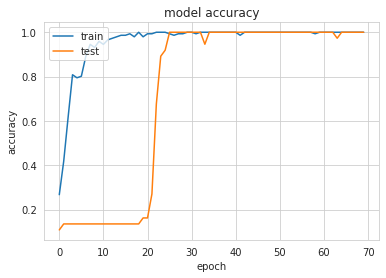

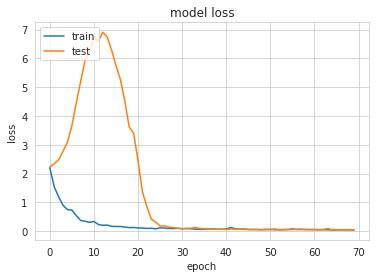

In [ ]:
# TRAINING OF THE NL-CNN MODEL  
#-----------------  for reproductibility  ----------------------
import tensorflow as tf 
from numpy.random import seed
seed(1)
tf.random.set_seed(2)
#----------------------------------------------------

# import keras                        ## KERAS AND TF.KERAS ARE NOT COMPATIBLE, NOR ARE THEY INTERCHANGABLE.
import numpy as np # linear algebra
# import keras.backend as K 

import time as ti 
import scipy.io as sio
import matplotlib.pyplot as plt

#=====================================================================
batch_size=5
epoci = 70
# from keras import backend as K
# K.set_value(model.optimizer.learning_rate, 0.00001)
#----------------------------------------------------------------------------------------
# log_dir = "/content/drive/MyDrive/Models_Variables/logs/fit" + f"TESSRAVDESS_F_{model.filtre}_LR_{K.eval(model.optimizer.lr)}_BS_{batch_size}"

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model_save_path="/content/drive/MyDrive/Models_Variables/saved/"
lr = (tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr = 0.00001))
check =tf.keras.callbacks.ModelCheckpoint(model_save_path, save_best_only=True, monitor="val_accuracy", mode='max'),
earlystopping=keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=5, verbose=2, mode='max',
    baseline=None, restore_best_weights=True)

# model_history=model.fit(x_train, y_train,
model_history=model.fit(x_train, y_train,
batch_size=batch_size,
verbose=1,  # aici 0 (nu afiseaza nimic) 1 (detaliat) 2(numai epocile)
validation_data=(x_test, y_test),
epochs=epoci,
callbacks=[lr,check])
# ,callbacks=[callback])
      
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
np.save('us_xtrain_fold1_45_6.npy',x_train,allow_pickle=True)  #fold1 used for validation. training on 2-9
np.save('us_ytrain_fold1_45_6.npy',y_train,allow_pickle=True)
np.save('us_xtest_fold1_45_6.npy',x_test,allow_pickle=True)
np.save('us_ytest_fold1_45_6.npy',y_test,allow_pickle=True)

In [ ]:
model=load_model(model_save_path)

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Models_Variables/logs/

In [ ]:
# SAVING AND VISUALIZATION OF A MODEL  
#-----------------------------------------------------------
nume_dorit='esc_214_7_tf220'  # desired name for your model 
model.save(nume_dorit+'.h5')  

# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file=nume_dorit+'.png', show_shapes=True, show_layer_names=True, dpi=96)

In [ ]:
tf.__version__

'2.2.0'

In [ ]:

# plot the model 
from keras.utils import plot_model
plot_model(model, show_shapes='True', to_file='model.png')

In [ ]:
# CELL 4 - evaluate the loaded model 
import time as ti 
t1=ti.time()
score = model.evaluate(x_test, y_test, verbose=1)
t2=ti.time()
print('Test accuracy:', score[1])
print ('Time for test set : ',t2-t1)
print('Latency (per input sample):', 1000*(t2-t1)/np.shape(x_test)[0], 'ms')


30/30 [==============================] - 0s 14ms/step - loss: 0.6197 - accuracy: 0.8494
Test accuracy: 0.8494167327880859
Time for test set :  0.7589194774627686
Latency (per input sample): 0.8047926590273261 ms


Original label : 7.0
Recognized label:  7


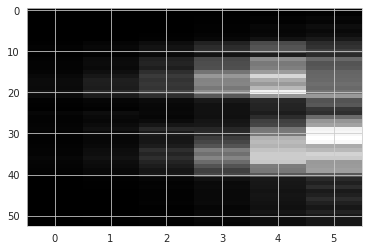

In [ ]:
# CELL 5 Random samples prediction

selectia=int(np.shape(x_test)[0]*np.random.rand(1))  # 

img1=x_test[selectia,:,:,:]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
if np.shape(x_train)[3]==1:
  plt.imshow(img1[:,:,0],cmap='gray', aspect='auto')
elif np.shape(x_train)[3]==3:
  plt.imshow(img1)

label=np.dot(y_test[selectia,:],1+np.array(range(num_classes)).T)
print('Original label :', label)
z=model.predict(x_test[selectia:selectia+1,:,:,:])
print('Recognized label: ',1+np.argmax(z))


In [ ]:
# CELL 6 -  Evaluate performance metrics 
# 
#----------------------------------------------------------------

labels=(np.dot(y_test,np.array(range(num_classes)).T)).astype('int16')
pred= model.predict(x_test)
predicted_class_indices=np.argmax(pred,axis=1)
from sklearn.metrics import classification_report, confusion_matrix
C=confusion_matrix(predicted_class_indices,labels)
print (C)
print('Classification Report')
print(classification_report(labels,predicted_class_indices ))


[[134   1   4  10   1   3   2]
 [  3 115   4   0   2   1   0]
 [  1   2 105   7   5   6   9]
 [  5   1   1 108   2   5   7]
 [  2   3   2   6 145  11   1]
 [  0   3   1   2  11 104   3]
 [  1   4   1   6   3   0  90]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       146
           1       0.92      0.89      0.91       129
           2       0.78      0.89      0.83       118
           3       0.84      0.78      0.81       139
           4       0.85      0.86      0.86       169
           5       0.84      0.80      0.82       130
           6       0.86      0.80      0.83       112

    accuracy                           0.85       943
   macro avg       0.85      0.85      0.85       943
weighted avg       0.85      0.85      0.85       943



In [ ]:
print(Z[1])

In [ ]:
np.save('tess_xtrain_split.npy',x_train,allow_pickle=True)
np.save('tess_xtest_split.npy',x_test,allow_pickle=True)
np.save('tess_ytrain_split.npy',y_train,allow_pickle=True)
np.save('tess_ytest_split.npy',y_test,allow_pickle=True)

Next code gives the implementation of the RDT spectral image processors and demonstrates its use in a complete chain of prediction: 

sound-file in .wav format --> RDT spectral image ---> NL-CNN label predictor

.wav files must be loaded in the "Files" tab 

In [ ]:
# needed to install a package for reading sounds 
!pip install soundfile 

In [ ]:
# CELL 7 
#Implementation of RDT based spectral image processor  
# Coyright Radu & Ioana DOGARU - 17 July 2020; 20 Oct. 2020
# Code associated with papers: 

# R. Dogaru and I. Dogaru, "A low complexity solution for epilepsy detection using an improved version 
# of the reaction-diffusion transform," 2017 5th International Symposium on Electrical and Electronics Engineering 
# (ISEEE), Galati, 2017, pp. 1-6.

# I. Dogaru, D. Stan and R. Dogaru, "Compact Isolated Speech Recognition on Raspberry-Pi based on 
# Reaction Diffusion Transform," 2019 6th International Symposium on Electrical and Electronics Engineering 
# (ISEEE), Galati, Romania, 2019, pp. 1-4.

# R. Dogaru and I. Dogaru, "RD-CNN: A Compact and Efficient Convolutional Neural Net for Sound Classification", in 
# Proceedings ISETC, 2020. 

# If you find this code useful in your research, please consider citing the above papers 
#----------------------------------------------------------------------
import time as ti 
import soundfile as sf
import numpy as np
from librosa.effects import trim as trim_audio
from scipy.io import wavfile
import scipy.signal as sps
from io import BytesIO




def read_signal(wfile):
    data, samplerate = sf.read(wfile)              
    #data, samplerate = librosa.load(wfile)           ## using librosa.load() downsamples the file. 
    # if int("2") in np.shape(data):
    #   data=librosa.to_mono(data)
    # print(np.shape(data))
    # data = trim_audio(data, top_db=1000)[0]                 ## very high value --> doesn't apply
    # print(f"Data: {data}\n, Type: {type(data)}\n SampleRate: {samplerate}\n")
    N=np.shape(data)[0]
    
    data=np.reshape(data.T,(1,N)) 
    
    #data=np.reshape(data.T,(1,N))
    # iesirea este in formatul acceptat de functiile RDT 
    return data

def NRDT(signal, w, flag, channels):
# Signal is an NP.ARRAY - format [1,N]  
# channells is a list of delays  
# 
#----------- channels = 1 2 5 ... 9 
    
    signal=signal.astype('float32') # may help  
    Nsamples=np.size(signal,1)
    delmax=w/4 #  delay should be no more than w/4 (w usually is a power of 2)
    res=np.where(channels<=delmax)
    #print(res)
    channels=channels[res]  # remove channels not satisfying this condition. 
    m=np.shape(channels)[0]
    

    spectrograms=Nsamples//w # The number of spectrograms computed
    # print(f"Spectrogram number: {spectrograms}\n Nr samples: {Nsamples}\n w={w}")
    Samples=spectrograms*w # The number of samples used to compute the spectrograms.The other samples are discarded
    matrix=np.reshape(signal[0,0:Samples],(spectrograms,w)) # each line is one to be submited for computation of spectrogram 
    
    
    spectrum=np.zeros((m,spectrograms))
    for i in range(0,spectrograms):
        values=matrix[i,:] # the whole line 
        for k in range(0,m):
            delay=channels[k]  # delays   
            t=np.array(range(delay,w-delay-1))
            difus=np.abs(values[t-delay]+values[t+delay]-2*values[t])
            if flag==0:
                spectrum[k,i]=np.mean(difus)/4
            elif flag==1:
                spectrum[k,i]=np.mean(difus/(np.abs(values[t-delay])+np.abs(values[t+delay])+2*np.abs(values[t])+1e-12))/4
    return spectrum 


def get_features_nrdt(filename, M, w, flag, prag, chan):
# Implements "spectral image (F3org)" using RDT applied on  M  segments, W window size . 
# Gives errors if the number of windows per segment is smaller than  1 
# Needs tuning of M, w. 
# chan - a list of delays for the "spectral" channels 
# prag - it is usually taken 0 (in special cases larger)
# flag - 0 (normal) / 1 (scaled RDT)
#=========================================================================
  signal=read_signal(filename)
  # signal [1,N] este scalaat -1,1 
  delmax=w/4 #  ne asiguram ca delay-ul maxim nu depaseste w/4 (w este de regula putere a lui 2)
  res=np.where(chan<=delmax)
  #print(res)
  channels=chan[res]
  m=np.shape(chan)[0]
  
  # print('Threshold for sample removal', prag )
  # print('Full length of original signal is : ',np.size(signal))
  t1=ti.time()
  res=np.where(np.abs(signal)>=prag)
  semnal=signal[0,res[1]]
  semnal=np.reshape(semnal.T,(1,np.shape(semnal)[0]))
  Features=np.zeros((M*m))
  # print(M, m)
  Feat_spec=np.zeros((M,m)) 
  Npsgm=np.shape(semnal)[1] // M # The number of samples per each segment
  # print('Nsegm=',Npsgm, 'Windows per each segment: ', Npsgm // w)
  print(f"Number of samples per each segment: {Npsgm}\n Number of windows per each segment: {Npsgm // w}\nWindow size: {w}")
  for isgm in range(0,M): # Calculate the RDT on each segment of the signal 
      ssegment=np.reshape(semnal[0,isgm*Npsgm:(isgm+1)*Npsgm],(1,Npsgm))
      spectrum=NRDT(ssegment,w,flag,chan)
      # print(spectrum)
      mediumRDT=sum(np.transpose(spectrum)) # The medium spectrogram is the sum on columns of the transposed spectrum matrix
      # print(M, mediumRDT)
      Features[isgm*m:(isgm+1)*m]=mediumRDT # The feature vector for the signal to be recognized
      Feat_spec[isgm,:]=mediumRDT.T
  t2=ti.time()
  
  return Features, Feat_spec


In [ ]:
# Example of computing a spectral image using NLRDT (here for the whole signal)
import matplotlib.pyplot as plt
# my_signal_file='/content/2-32515-A-4.wav' 
my_signal_file = audios[-1]
signal=read_signal(my_signal_file)
linspec=np.array([2, 4, 8, 16, 20, 32, 50, 64, 100, 128, 200, 300])
spect=NRDT(signal, 1000, 0, linspec)
plt.imshow(spect, aspect='auto')

Streaming output truncated to the last 5000 lines.
Shape of processed data: (53, 6)
Processing /content/drive/MyDrive/Databases/audioEmotion/Actor_15/03-01-03-01-01-01-15.wav
Number of samples per each segment: 1455
 Number of windows per each segment: 2
Window size: 512
RDT Processing time:  0.39720964431762695  seconds
Shape of processed data: (53, 6)
Processing /content/drive/MyDrive/Databases/audioEmotion/Actor_15/03-01-02-01-01-02-15.wav
Number of samples per each segment: 1562
 Number of windows per each segment: 3
Window size: 512
RDT Processing time:  0.22424721717834473  seconds
Shape of processed data: (53, 6)
Processing /content/drive/MyDrive/Databases/audioEmotion/Actor_15/03-01-02-01-01-01-15.wav
Number of samples per each segment: 1863
 Number of windows per each segment: 3
Window size: 512
RDT Processing time:  0.29604268074035645  seconds
Shape of processed data: (53, 6)
Processing /content/drive/MyDrive/Databases/audioEmotion/Actor_15/03-01-02-01-02-01-15.wav
Number of

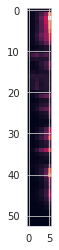

In [ ]:
## Get Features with RDT
import wave
from google.colab import files
from librosa.effects import trim as trim_audio
import time as ti
import numpy as np
X, Y, Z, name = [], [], [], []   ## Z is used to store the fold when using predefined KFold cross-validation, such as in the case of UrbanSounds8K

i=0 ## increment for except block
# for path, emotion in zip(Ravdess_df.Path, Ravdess_df.Emotions):
for path, emotion, fold in zip(urbansound_df.Path, urbansound_df.Class, urbansound_df.Fold):     ## Use to store fold for cross-validation and append it to Z list
# for path, emotion in zip(Comenzi_df.Path, Comenzi_df.Class):   ## emotion --> cls in case of sounds
  t1=ti.time()
  print(f"Processing {path}")
  my_signal_file = path
  #my_signal_file, signal_sr=librosa.load(path, sr=None)  # figure before .wav represents the labeled category (1 to 50)
 # my_signal_file, index_trim = trim_audio(my_signal_file)
  try:

    # samples = wave.open(path, 'r').getnframes()
    
    # print(samples) ## number of samples of wav
    #signal=read_signal(my_signal_file)
    # Define the delay list and parameters according with the training data (Ns,m)=214,7 
    chan=np.array([1, 2, 4, 8, 16, 32])   ## let m = log2(Sw) - 3
    # Call the RDT spectral image function 
    (F3, F3org)=get_features_nrdt(my_signal_file, 45, 512, 0, 0.0001, chan)
    X.append(F3org)
    Y.append(emotion)
    Z.append(fold)         ### for US8K folds 
    #name.append(path)
    t2=ti.time()
    print('RDT Processing time: ', t2-t1, ' seconds')
    print(f"Shape of processed data: {np.shape(F3org)}")
    plt.imshow(F3org)
  except Exception as e:
    print(e)
    i=i+1
print(f"Done populating X and Y. Len X: {len(X)}, Len Y: {len(Y)}. Failed processing {i} samples out of {len(X)+i} total samples.")



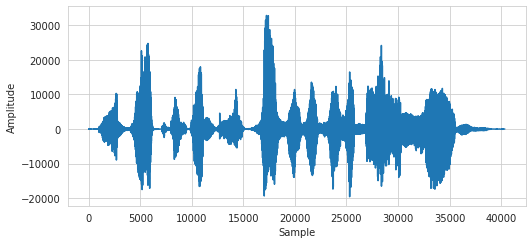

In [ ]:
# plot wave

from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
input_data = read("/content/drive/MyDrive/Databases/emo-db/16b10Wb.wav")
audio = input_data[1]
plt.plot(audio[0:])
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

Processing /content/drive/MyDrive/Databases/emo-db/16b10Wb.wav
Number of samples per each segment: 380
 Number of windows per each segment: 1
Window size: 256
RDT Processing time:  0.07947754859924316  seconds
Shape of processed data: (106, 7)


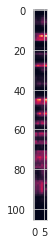

In [ ]:
## Get Features with RDT FOR A SINGLE FILE
import wave
from google.colab import files
from librosa.effects import trim as trim_audio
import time as ti
import numpy as np

t1=ti.time()
path = "/content/drive/MyDrive/Databases/emo-db/16b10Wb.wav"
print(f"Processing {path}")
my_signal_file = path
#my_signal_file, signal_sr=librosa.load(path, sr=None)  # figure before .wav represents the labeled category (1 to 50)
# my_signal_file, index_trim = trim_audio(my_signal_file)
try:

  # samples = wave.open(path, 'r').getnframes()
  
  # print(samples) ## number of samples of wav
  #signal=read_signal(my_signal_file)
  # Define the delay list and parameters according with the training data (Ns,m)=214,7 
  chan=np.array([1, 2, 4, 8, 16, 32, 64])   ## let m = log2(Sw) - 3
  # Call the RDT spectral image function 
  (F3, F3org)=get_features_nrdt(my_signal_file, 106, 256, 0, 0.000, chan)
  # Z.append(fold)         ### ADD HERE 
  t2=ti.time()
  print('RDT Processing time: ', t2-t1, ' seconds')
  print(f"Shape of processed data: {np.shape(F3org)}")
  plt.imshow(F3org)
except Exception as e:
  print(e)




In [ ]:
np.save('X_53-6-comenzi.npy', X, allow_pickle=True)
np.save('Y_53-6-comenzi.npy', Y, allow_pickle=True)

In [ ]:
np.save('X_107-8-ESC.npy', X, allow_pickle=True)
np.save('Y_107-8-ESC.npy',Y,  allow_pickle=True)
# np.save('X_65-6-TessRavdess.npy', X, allow_pickle=True)
# np.save('Y_65-6-TessRavdess.npy', Y, allow_pickle=True)
# np.save('X_45_6_US_folded', X, allow_pickle=True)
# np.save('Y_45_6_US_folded', Y, allow_pickle=True)
# np.save('Z_45_6_US_folded', Z, allow_pickle=True)
#use np.load() to load afterwards

In [ ]:
np.save('X_53-6-emodb',X,allow_pickle=True)
np.save('Y_53-6-emodb',Y,allow_pickle=True)

In [ ]:
np.save('X_30-6-comenzi',X,allow_pickle=True)
np.save('Y_30-6-comenzi',Y,allow_pickle=True)

In [ ]:

# np.save('X_53-6-RTE.npy',X,allow_pickle=True)
# np.save('Y_53-6-RTE.npy',Y,allow_pickle=True)

X=np.load('/content/drive/MyDrive/Models_Variables/X_53-6-RTE.npy')
Y=np.load('/content/drive/MyDrive/Models_Variables/Y_53-6-RTE.npy')

In [ ]:
X=np.load('/content/drive/MyDrive/Models_Variables/X_53_6_ESC50.npy')
Y=np.load('/content/drive/MyDrive/Models_Variables/Y_53_6_ESC50.npy')

In [ ]:
X=np.load('/content/drive/MyDrive/Models_Variables/X_53-6-emodb.npy')
Y=np.load('/content/drive/MyDrive/Models_Variables/Y_53-6-emodb.npy')

In [ ]:
x_train=np.load('/content/drive/MyDrive/Models_Variables/esc_x_train_214_7.npy')
y_train=np.load('/content/drive/MyDrive/Models_Variables/esc_y_train_214_7.npy')
x_test=np.load('/content/drive/MyDrive/Models_Variables/esc_x_test_214_7.npy')
y_test=np.load('/content/drive/MyDrive/Models_Variables/esc_y_test_214_7.npy')
## do not expand dims. 
kfold = False

In [ ]:
x_train=np.load('/content/drive/MyDrive/Models_Variables/Tess_savedsplit/tess_xtrain_split.npy')
y_train=np.load('/content/drive/MyDrive/Models_Variables/Tess_savedsplit/tess_ytrain_split.npy')
x_test=np.load('/content/drive/MyDrive/Models_Variables/Tess_savedsplit/tess_xtest_split.npy')
y_test=np.load('/content/drive/MyDrive/Models_Variables/Tess_savedsplit/tess_ytest_split.npy')
## do not expand dims. 
kfold = False

In [ ]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
print(train_dataset)

<TensorSliceDataset shapes: ((53, 6, 1), (7,)), types: (tf.float32, tf.float64)>


In [ ]:
print(y_train[7])

[0. 0. 0. 0. 1. 0. 0.]


In [ ]:
X=np.load('/content/drive/MyDrive/Models_Variables/X_53-6-Ravdess.npy')
Y=np.load('/content/drive/MyDrive/Models_Variables/Y_53-6-Ravdess.npy')

In [ ]:
# print(Tess_df.Emotions)
print(len(Z))
print(len(X))
print(len(Y))


In [ ]:
np.save('/content/drive/MyDrive/Models_Variables/X_53-6-Ravdess220.npy', X, allow_pickle=True) 
np.save('/content/drive/MyDrive/Models_Variables/Y_53-6-Ravdess220.npy', Y, allow_pickle=True)

In [ ]:
X = np.load('/content/drive/MyDrive/Models_Variables/X_65-6-Ravdess.npy')  ## simple (calm = neutral)
Y = np.load('/content/drive/MyDrive/Models_Variables/Y_65-6-Ravdess.npy')

In [ ]:
X = np.load('/content/drive/MyDrive/Models_Variables/X_65-6-TessRavdess.npy')
Y = np.load('/content/drive/MyDrive/Models_Variables/Y_65-6-TessRavdess.npy')

In [ ]:
X = np.load('/content/drive/MyDrive/Models_Variables/X_214-7-ESC.npy')
Y = np.load('/content/drive/MyDrive/Models_Variables/Y_214-7-ESC.npy')


# X = np.load('/content/drive/MyDrive/Models_Variables/X_107-8-ESC.npy')
# Y = np.load('/content/drive/MyDrive/Models_Variables/Y_107-8-ESC.npy')

In [ ]:
X = np.load('/content/drive/MyDrive/Models_Variables/X_30-6-comenzi.npy')
Y = np.load('/content/drive/MyDrive/Models_Variables/Y_30-6-comenzi.npy')

In [ ]:
X = np.load('/content/drive/MyDrive/Models_Variables/X_45_6_US_folded.npy')
Y = np.load('/content/drive/MyDrive/Models_Variables/Y_45_6_US_folded.npy')
Z = np.load('/content/drive/MyDrive/Models_Variables/Z_45_6_US_folded.npy')

In [ ]:
print(np.shape(X))

In [ ]:
# CELL 8 
# PREDICTION OF THE TRAINED MODEL WITH A GIVEN SIGNAL FILE (here signals from the dataset are used 
# but others may be used instead)

import time as ti
t1=ti.time()
my_signal_file=name[10]  # figure before .wav represents the labeled category (1 to 50)
#signal=read_signal(my_signal_file)
# Define the delay list and parameters according with the training data (Ns,m)=214,7 
chan=np.array([1, 2, 4, 8, 16, 32])
# Call the RDT spectral image function 
(F3, F3org)=get_features_nrdt(my_signal_file, 53, 512, 0, 0.0, chan)
t2=ti.time()
print('RDT Processing time: ', t2-t1, ' seconds')
plt.imshow(F3org,aspect='auto')
# Call the trained NL-CNN model (previously loaded)
shp=np.shape(F3org)
# print(shp)
# labels={
#     0:"anger",
#     1:"boredom",
#     2:"disgust",
#     3:"fear",
#     4:"happiness",
#     5:"sadness",
#     6:"neutral"
# }
z=model.predict(np.reshape(F3org,(1,shp[0],shp[1],1)))
# z=model.predict(np.reshape(F3,(1,shp[0],1)), verbose=1)
t3=ti.time()
print(f"Result Z: {z}")
print(z)
print(f'Recognized label for signal: ',my_signal_file,' is: ', np.argmax(z)) 
#f' emotion: {labels[np.argmax(z)]} \n')

print('Recognition time on CPU: ',t3-t2)

print('Total recognition time: ',t3-t1,' seconds')
# Runtime is better CPU to evaluate performance close to what happens on resources-constrained platforms 
print('You may hear the sound - next is its image spectrogram')
from IPython.display import Audio
Audio(my_signal_file)